<a href="https://colab.research.google.com/github/AndresPautrat/DataMining/blob/main/Trabajo_Parcial_Data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-Term Assignment - Data Mining

By: Renzo Perez, Andrés Pautrat y Daniel Núñez

For this project, we are working with a dataset that seeks to identify certain behaviours during the collision of protons. These behaviours range from common or uninteresting (which is called a background label) to interesting behaviours, which are called 'Signal' in the label.
In the following notebook, we will present a model that will allow us to identify the patterns that create a 'Signal' reaction (as opposed to background) during the collision of protons.

We believe that the following model is a correct approach to the solution because, through the pre-processing of information, we have narrowed down the noise coming from the data. By using feature selection, we have determined which columns are the most important to analyze as well as reduced the workload of our model. We also believe that our Multi-Layered-Perceptron model is a right approach because this way we can apply all of the knowledge from the processed data in a way that we can generalize it.

For the experimental phase of the model, we attempted to find the best possible model. For this purpose, we have created 60 models, looking for the one with the best accuracy metric.

## Imports, loading of the dataset and a first look at the information

To load the dataset, we used pandas. To mount the data, we used Google Drive and mounted the file from it. In the following cells, the imports can be observed.

sklearn was imported for the neural network and f1-measures.

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data mining/Trabajo parcial/dataset/training.csv')
#data = pd.read_csv('/content/drive/My Drive/2020-2/Data_Mining/Datasets/training.csv')
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


## Relevant Information...
From the following text acquired from the documentation:  

*   b = Events with little interesting results and already known behaviours, "background"...  
*   s = "Signal" is the area where they have many significant events...  
* -999.000 = It's data of little interest and not classified in the dataset... 


We can determine that our target is the column named 'Label,
and that any rows of information containing the value of -999 should be interpreted as a NaN value. This will be useful for the data pre-processing

# Pre-processing

In this part we drop column EventId, because be noisy data and is irrelevant for analysis of data and training of this.

In [ ]:
# eliminar columna id
data = data.drop(['EventId'],axis = 1)

In [ ]:
data = data.drop_duplicates() 

In [ ]:
data

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,1.258,-1.414,-999.0,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,1.162,-1.345,-999.0,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,1.202,0.529,-999.0,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,0.999,1.414,-999.0,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


## We split the data so that 96% percent of it goes to training, and the remaining 4% is used for testing.

In [ ]:
x_train = data.iloc[:240000,:-1]
y_train = data.iloc[:240000,-1]

x_test = data.iloc[240000:,:-1]
y_test = data.iloc[240000:, -1]

In [ ]:
y_train = y_train.replace('s',1)
y_train = y_train.replace('b',0)

y_test = y_test.replace('s',1)
y_test = y_test.replace('b',0)

## Data analysis

Going back to our previous statement regarding NaN values, we now check for -999 values so that we can get an idea on which columns contain little information. If the missing values are too high, it's a good idea to drop these columns altogether, but other rows we can replace these values with the mean of the remaining values.

## Calculating missing values and replacing these with the mean values of the remaining values

In [ ]:
print("\t\t Features \t missing values \t values")
for i in x_train:
  count = 0
  for j in x_train[i]:
    if j == -999 :
      count +=1
  print("%27s \t %10d  %10d"%(i, count,len(x_train[i])) )

		 Features 	 miss values 	 values
               DER_mass_MMC 	      36646      240000
DER_mass_transverse_met_lep 	          0      240000
               DER_mass_vis 	          0      240000
                   DER_pt_h 	          0      240000
       DER_deltaeta_jet_jet 	     170408      240000
           DER_mass_jet_jet 	     170408      240000
        DER_prodeta_jet_jet 	     170408      240000
         DER_deltar_tau_lep 	          0      240000
                 DER_pt_tot 	          0      240000
                 DER_sum_pt 	          0      240000
       DER_pt_ratio_lep_tau 	          0      240000
     DER_met_phi_centrality 	          0      240000
     DER_lep_eta_centrality 	     170408      240000
                 PRI_tau_pt 	          0      240000
                PRI_tau_eta 	          0      240000
                PRI_tau_phi 	          0      240000
                 PRI_lep_pt 	          0      240000
                PRI_lep_eta 	          0      240000
           

In [ ]:
index = []
for i in x_train:
  index.append([i,x_train[i].mean()])
  print("%27s \t %f"%(i,x_train[i].mean()))

               DER_mass_MMC 	 95.742211
DER_mass_transverse_met_lep 	 49.252977
               DER_mass_vis 	 81.185493
                   DER_pt_h 	 57.890459
       DER_deltaeta_jet_jet 	 -502.452037
           DER_mass_jet_jet 	 -319.415095
        DER_prodeta_jet_jet 	 -504.049433
         DER_deltar_tau_lep 	 2.373003
                 DER_pt_tot 	 18.905075
                 DER_sum_pt 	 158.388998
       DER_pt_ratio_lep_tau 	 1.437975
     DER_met_phi_centrality 	 -0.128979
     DER_lep_eta_centrality 	 -503.416027
                 PRI_tau_pt 	 38.698591
                PRI_tau_eta 	 -0.011096
                PRI_tau_phi 	 -0.008186
                 PRI_lep_pt 	 46.668022
                PRI_lep_eta 	 -0.020329
                PRI_lep_phi 	 0.044687
                    PRI_met 	 41.730031
                PRI_met_phi 	 -0.009867
              PRI_met_sumet 	 209.738385
                PRI_jet_num 	 0.978946
         PRI_jet_leading_pt 	 -88.334138
        PRI_jet_leading_eta 	 -15

In [ ]:
print("\t\t Features \t Exchanges \t Values")
for i in x_train:
  count = 0
  mean = x_train[i].mean()
  for j in range(len(x_train[i])):
    if x_train[i][j] == -999 :
      #cambio mean optimizacion
      x_train[i][j] = mean
      count +=1
  print("%27s \t %10d  %10d"%(i, count,len(x_train[i])) )

		 Features 	 Exchanges 	 Values


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


               DER_mass_MMC 	      36646      240000
DER_mass_transverse_met_lep 	          0      240000
               DER_mass_vis 	          0      240000
                   DER_pt_h 	          0      240000
       DER_deltaeta_jet_jet 	     170408      240000
           DER_mass_jet_jet 	     170408      240000
        DER_prodeta_jet_jet 	     170408      240000
         DER_deltar_tau_lep 	          0      240000
                 DER_pt_tot 	          0      240000
                 DER_sum_pt 	          0      240000
       DER_pt_ratio_lep_tau 	          0      240000
     DER_met_phi_centrality 	          0      240000
     DER_lep_eta_centrality 	     170408      240000
                 PRI_tau_pt 	          0      240000
                PRI_tau_eta 	          0      240000
                PRI_tau_phi 	          0      240000
                 PRI_lep_pt 	          0      240000
                PRI_lep_eta 	          0      240000
                PRI_lep_phi 	          0      

In [ ]:
index = sorted(index,key=lambda x: x[1])

In [ ]:
index

[['DER_prodeta_jet_jet', -504.0494326383535],
 ['PRI_jet_subleading_eta', -503.6496305500951],
 ['PRI_jet_subleading_phi', -503.6445189218064],
 ['DER_lep_eta_centrality', -503.4160271321145],
 ['DER_deltaeta_jet_jet', -502.45203667292856],
 ['PRI_jet_subleading_pt', -475.0487833134003],
 ['DER_mass_jet_jet', -319.41509451755746],
 ['PRI_jet_leading_phi', -159.59775040061098],
 ['PRI_jet_leading_eta', -159.59019775617313],
 ['PRI_jet_leading_pt', -88.33413795790227],
 ['DER_met_phi_centrality', -0.12897918333333896],
 ['PRI_lep_eta', -0.02032911666666655],
 ['PRI_tau_eta', -0.01109636666666677],
 ['PRI_met_phi', -0.009866650000000247],
 ['PRI_tau_phi', -0.008186033333333436],
 ['PRI_lep_phi', 0.044687075000000256],
 ['PRI_jet_num', 0.9789458333333333],
 ['DER_pt_ratio_lep_tau', 1.4379748374999988],
 ['Weight', 1.647410550530035],
 ['DER_deltar_tau_lep', 2.373003091666649],
 ['DER_pt_tot', 18.905075229166457],
 ['PRI_tau_pt', 38.6985910541668],
 ['PRI_met', 41.730030733332846],
 ['PRI_l

## Feature selection

### In order to reduce the work load of our model, we need to evaluate which columns are important to maintain. For this purpose, we have developed a feature selection function that will analyze the top 5 most important columns to use in our models.

In [ ]:
def embedded(x_,y_):
    rf = RandomForestRegressor()
    rf.fit(x_, y_)
    scores_ = rf.feature_importances_
    columnsEmbeding = []
    tupla = []
    for i in range(len(scores_)):
        tupla.append( (x_.columns[i], scores_[i]) )
    tupla.sort(key=lambda tup: tup[1])
    for i in range(5):
        columnsEmbeding.append(tupla[i][0])
    return columnsEmbeding

In [ ]:
columns = embedded(x_train,y_train)

In [ ]:
columns

['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet']

In [ ]:
x_train = x_train[columns]
x_test = x_test[columns]

## Data Normalization
We normalize the data to narrow the distance between points and prevent redundancy and overfitting.

In [ ]:
x_train=normalize(x_train)
x_test=normalize(x_test)

#Neural Network Model with sklearn

### Experimentation Process

For the experimentation we have used 60 models, varying in the hyper parameters (parameters used by the classifiers).  In this case, the activation functions are:

*   Identity
*   Logistic
*   Tanh
*   Relu

While our solvers/optimizers are the following:

* lbfgs
* sgd
* adam

When using cross-validation, we used a K-Fold of 10, which splits the data in packages of 10's. Here, we can acquire a more precise accuracy.

In [ ]:
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']

In [ ]:
def redes_neuronales_hiperparametros(layer, max_iter,learning_rate, activation, alpha,solver,x_train,x_test,y_train,y_test):
  red_neuronal =  MLPClassifier(solver = solver,hidden_layer_sizes=layer, max_iter=max_iter, learning_rate_init=learning_rate, activation=activation, alpha=alpha, verbose = False)
  red_neuronal.fit(x_train, y_train)
  prediccionesMLP = red_neuronal.predict(x_test)
  cv_resultado = cross_val_score(red_neuronal, x_train, y_train, cv=10, scoring='f1_macro')
  f1 = np.mean(cv_resultado)
  print(activation,solver)
  print(accuracy_score(y_test, prediccionesMLP))
  print(confusion_matrix(y_test, prediccionesMLP))
  print(classification_report(y_test, prediccionesMLP))
  print("cross validation f1: ", f1)
  return red_neuronal, cv_resultado

In the following cell, we have applied the following formula to determine the layers, max iteratoins and learning rate:



```
( 2+2*(i%2), (2+(j%2)), ((i+2)*(2+k)),((i*j)+((k+1)*2))) , 10**(7*i+j+k),0.01, activation[i], 1e-5 * (10**(i+1))
```
where i represents the activation functions  
j represents the solvers/optimizers  
and k represents the number of versions that we will use for each i and j


In [ ]:
modelos_redes = []
for i in range(len(activation)):
  for j in range(len(solver)):
    for k in range(5):
      modelos_redes += [redes_neuronales_hiperparametros( ( 2+2*(i%2), (2+(j%2)),((i+2)*(2+k)),((i*j)+((k+1)*2))) , 10**(7*i+j+k),0.01, activation[i], 1e-5 * (10**(i+1)) ,solver[j],x_train,x_test,y_train,y_test)]

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

identity lbfgs
0.656
[[6560    0]
 [3440    0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      6560
           1       0.00      0.00      0.00      3440

    accuracy                           0.66     10000
   macro avg       0.33      0.50      0.40     10000
weighted avg       0.43      0.66      0.52     10000

cross validation f1:  0.40028466302764193


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

identity lbfgs
0.6624
[[5396 1164]
 [2212 1228]]
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      6560
           1       0.51      0.36      0.42      3440

    accuracy                           0.66     10000
   macro avg       0.61      0.59      0.59     10000
weighted avg       0.64      0.66      0.64     10000

cross validation f1:  0.5220238501459289


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

identity lbfgs
0.678
[[5926  634]
 [2586  854]]
              precision    recall  f1-score   support

           0       0.70      0.90      0.79      6560
           1       0.57      0.25      0.35      3440

    accuracy                           0.68     10000
   macro avg       0.64      0.58      0.57     10000
weighted avg       0.65      0.68      0.64     10000

cross validation f1:  0.5641837410336368
identity lbfgs
0.678
[[5926  634]
 [2586  854]]
              precision    recall  f1-score   support

           0       0.70      0.90      0.79      6560
           1       0.57      0.25      0.35      3440

    accuracy                           0.68     10000
   macro avg       0.64      0.58      0.57     10000
weighted avg       0.65      0.68      0.64     10000

cross validation f1:  0.562861584403764
identity lbfgs
0.6783
[[5928  632]
 [2585  855]]
              precision    recall  f1-score   support

           0       0.70      0.90      0.79      6560
           

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

identity sgd
0.6781
[[5947  613]
 [2606  834]]
              precision    recall  f1-score   support

           0       0.70      0.91      0.79      6560
           1       0.58      0.24      0.34      3440

    accuracy                           0.68     10000
   macro avg       0.64      0.57      0.56     10000
weighted avg       0.65      0.68      0.63     10000

cross validation f1:  0.5644001738296981
identity sgd
0.6785
[[6028  532]
 [2683  757]]
              precision    recall  f1-score   support

           0       0.69      0.92      0.79      6560
           1       0.59      0.22      0.32      3440

    accuracy                           0.68     10000
   macro avg       0.64      0.57      0.55     10000
weighted avg       0.66      0.68      0.63     10000

cross validation f1:  0.5695338448916938
identity sgd
0.6772
[[5891  669]
 [2559  881]]
              precision    recall  f1-score   support

           0       0.70      0.90      0.78      6560
           1  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logistic lbfgs
0.656
[[6560    0]
 [3440    0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      6560
           1       0.00      0.00      0.00      3440

    accuracy                           0.66     10000
   macro avg       0.33      0.50      0.40     10000
weighted avg       0.43      0.66      0.52     10000

cross validation f1:  0.39664079756078624


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logistic lbfgs
0.656
[[6560    0]
 [3440    0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      6560
           1       0.00      0.00      0.00      3440

    accuracy                           0.66     10000
   macro avg       0.33      0.50      0.40     10000
weighted avg       0.43      0.66      0.52     10000

cross validation f1:  0.39664079756078624


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logistic lbfgs
0.656
[[6560    0]
 [3440    0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      6560
           1       0.00      0.00      0.00      3440

    accuracy                           0.66     10000
   macro avg       0.33      0.50      0.40     10000
weighted avg       0.43      0.66      0.52     10000

cross validation f1:  0.39664079756078624


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logistic lbfgs
0.656
[[6560    0]
 [3440    0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      6560
           1       0.00      0.00      0.00      3440

    accuracy                           0.66     10000
   macro avg       0.33      0.50      0.40     10000
weighted avg       0.43      0.66      0.52     10000

cross validation f1:  0.39664079756078624


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logistic sgd
0.656
[[6560    0]
 [3440    0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      6560
           1       0.00      0.00      0.00      3440

    accuracy                           0.66     10000
   macro avg       0.33      0.50      0.40     10000
weighted avg       0.43      0.66      0.52     10000

cross validation f1:  0.39664079756078624


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logistic sgd
0.656
[[6560    0]
 [3440    0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      6560
           1       0.00      0.00      0.00      3440

    accuracy                           0.66     10000
   macro avg       0.33      0.50      0.40     10000
weighted avg       0.43      0.66      0.52     10000

cross validation f1:  0.39664079756078624


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logistic sgd
0.656
[[6560    0]
 [3440    0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      6560
           1       0.00      0.00      0.00      3440

    accuracy                           0.66     10000
   macro avg       0.33      0.50      0.40     10000
weighted avg       0.43      0.66      0.52     10000

cross validation f1:  0.39664079756078624


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logistic sgd
0.656
[[6560    0]
 [3440    0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      6560
           1       0.00      0.00      0.00      3440

    accuracy                           0.66     10000
   macro avg       0.33      0.50      0.40     10000
weighted avg       0.43      0.66      0.52     10000

cross validation f1:  0.39664079756078624


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logistic sgd
0.656
[[6560    0]
 [3440    0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.79      6560
           1       0.00      0.00      0.00      3440

    accuracy                           0.66     10000
   macro avg       0.33      0.50      0.40     10000
weighted avg       0.43      0.66      0.52     10000

cross validation f1:  0.39664079756078624


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


logistic adam
0.5808
[[4402 2158]
 [2034 1406]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      6560
           1       0.39      0.41      0.40      3440

    accuracy                           0.58     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.58      0.58      0.58     10000

cross validation f1:  0.7305428055225321
logistic adam
0.6614
[[5375 1185]
 [2201 1239]]
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      6560
           1       0.51      0.36      0.42      3440

    accuracy                           0.66     10000
   macro avg       0.61      0.59      0.59     10000
weighted avg       0.64      0.66      0.64     10000

cross validation f1:  0.7302922309565798
logistic adam
0.6794
[[5661  899]
 [2307 1133]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.78      6560
           

Execution time: 6 to 7 hours

### This was the best model we found with an accuracy of 73.97%

In [ ]:
modelMLP = redes_neuronales_hiperparametros( (5,6,14,15) , 10**(7*1+2+3),0.01, activation[1], 1e-5 * (10**(1+1)) ,solver[2],x_train,x_test,y_train,y_test)

logistic adam
0.6872
[[5772  788]
 [2340 1100]]
              precision    recall  f1-score   support

           0       0.71      0.88      0.79      6560
           1       0.58      0.32      0.41      3440

    accuracy                           0.69     10000
   macro avg       0.65      0.60      0.60     10000
weighted avg       0.67      0.69      0.66     10000

cross validation f1:  0.7397509505846456


Execution time: 20 to 30 minutes

Here we are saving the best model.

In [ ]:
joblib.dump(modelMLP, 'MLPBest.pkl') 

['MLPBest.pkl']

Here we are loading the model  
Afterwards, we get the parameters of the model

In [ ]:
ml = joblib.load('MLPBest.pkl')

In [ ]:
ml[0].get_params()

{'activation': 'logistic',
 'alpha': 0.001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (5, 6, 14, 15),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 1000000000000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
ml[0]

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 6, 14, 15), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=1000000000000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Keras

This is the second model we developed. For this one we used Keras
The following cell shows out imports.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.engine.saving import load_model

In [ ]:
x_train_tensor=x_train[columns].to_numpy()
y_train_tensor=y_train.to_numpy()

In [ ]:
x_test_tensor=x_test[columns].to_numpy()
y_test_tensor=y_test.to_numpy()

In [ ]:
x_train_tensor = normalize(x_train_tensor)

In [ ]:
len(x_train_tensor)

240000

For this model, we evaluated 4 layers, where the first one uses 5 neurons with Selu activation.  
The second layer uses 2 neurons and Sigmoid activation.  
The third one uses 3 neurons and Softmax activation.  
The fourth layer uses 1 neuron and Relu activation.

The optimizer used is SGD, and the metric used to evaluate the model is Accuracy, and the loss is Binary Cross-Entropy. With these parameters we achieved an accuracy of 65.74%

In [ ]:
model = Sequential([Dense(5, input_dim=5, activation= keras.activations.selu),
                    Dense(2,activation= keras.activations.sigmoid),
                    Dense(3,activation= keras.activations.softmax),
                    Dense(1, activation= keras.activations.relu)])
opt = keras.optimizers.SGD()
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train_tensor, y_train_tensor, epochs=30, batch_size=100, verbose=2)

Epoch 1/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 2/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 3/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 4/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 5/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 6/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 7/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 8/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 9/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 10/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 11/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 12/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 13/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 14/30
2400/2400 - 6s - loss: 5.2848 - accuracy: 0.6574
Epoch 15/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 16/30
2400/2400 - 5s - loss: 5.2848 - accuracy: 0.6574
Epoch 17/30
2400/2400 - 5s - loss

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.3062 - accuracy: 0.6560


[5.306183815002441, 0.656000018119812]

In [ ]:
model

In the following cells we save and load the model. Finally, we evaluate and plot the model using the Keras library.

In [ ]:
model.save(filepath="/content/drive/My Drive/Colab Notebooks/Data mining/Trabajo parcial/models/KerasMlp")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Data mining/Trabajo parcial/models/KerasMlp/assets


In [ ]:
a = load_model(filepath="/content/drive/My Drive/Colab Notebooks/Data mining/Trabajo parcial/models/KerasMlp")

In [ ]:
a.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.3062 - accuracy: 0.6560


[5.306183815002441, 0.656000018119812]

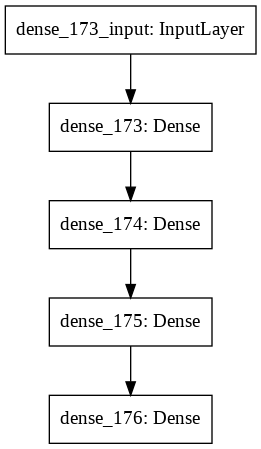

In [ ]:
keras.utils.plot_model(model)

## We plot the training and loss data from the second model

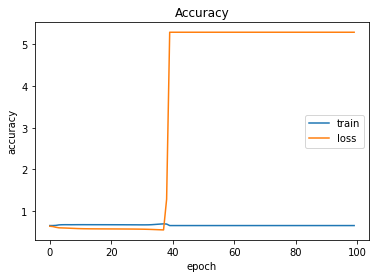

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='center right')
plt.show()